The given Matrix :
[[0 1 1 1 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 0]
 [0 0 0 1 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0]
 [0 0 0 0 1 1 0 1 1]
 [0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 1 0 0]]


Degree Centrality by function :
{0: 0.375, 1: 0.25, 2: 0.375, 3: 0.5, 4: 0.5, 5: 0.5, 6: 0.5, 7: 0.375, 8: 0.125}


Calculated Degree Centrality Values: [0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]


Closeness Centrality by function :
{0: 0.47058823529411764, 1: 0.34782608695652173, 2: 0.47058823529411764, 3: 0.6153846153846154, 4: 0.6153846153846154, 5: 0.6153846153846154, 6: 0.5, 7: 0.47058823529411764, 8: 0.34782608695652173}


Calculated Closeness Centrality Values: [0.47058823529411764, 0.34782608695652173, 0.47058823529411764, 0.6153846153846154, 0.6153846153846154, 0.6153846153846154, 0.5, 0.47058823529411764, 0.34782608695652173]


Betweenness Centrality Values by function:
dict_values([3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0])


Calculated Betweenness Cen

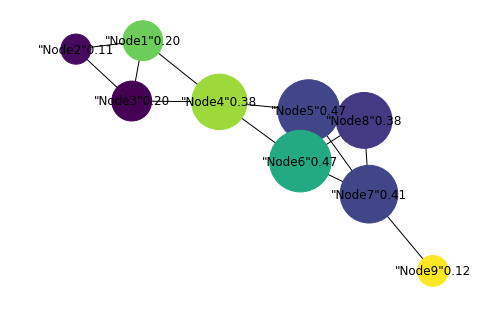

In [4]:
#***********************************************************************#
#Name : Anagha Fatale
#SUID: 438039600
#cis 600 : Assigment1
#***********************************************************************#

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Range1d
from scipy import stats
from numpy import linalg as LA

#***********************************************************************#
#Input the value of adjacent Matrix for variable A

A=np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
           [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])


print("The given Matrix :")
print(A)
n = len(A)
count = 0
G = nx.from_numpy_matrix(A)



#***********************************************************************#
#Calculating the number of shortestpath
def calculateMaxShortestPath(A):
    n1=len(A)
    G = nx.from_numpy_matrix(A)
    max = 0
    for i in range(n1):
        value = []
        for j in range(n1):
            length=nx.shortest_path_length(G,i,j)
            value.append(length)
        for m in value:
            if m>max:
                max = m
    return max

        
#***********************************************************************#

max_length = len(A)+1
print("\n")

#***********************************************************************#
A_powers = [np.linalg.matrix_power(A,m) for m in range(0,max_length)]
# We first define a matrix. Next, we will fill it up entry by entry.
sigma = np.zeros((n,n))
min_lengths = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        for x in range(0,max_length):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break
                
                
#***********************************************************************#
def Degree_Centrality (A) :
    DegreeCentrality = []
    NormalisedDegreeCentrality = []
    n=len(A)
    for i in A:
        CD=0
        CD_1=0
        #print (i)
        for j in i:
            CD = CD + j
            CD_1 = CD/(n-1)
        DegreeCentrality.append((CD))
        NormalisedDegreeCentrality.append(CD_1)
    return (NormalisedDegreeCentrality)

CalculatedDegree = Degree_Centrality (A)
Degree = nx.degree_centrality(G)
print("Degree Centrality by function :")
print(Degree)
print("\n")
print ("Calculated Degree Centrality Values:",CalculatedDegree)
print("\n")

#***********************************************************************#

def ShortPathBFS (A,startNode):
    n=len(A)
    visitedNodes = [False]*n
    dist = [0]*n
    nodes = []
    nodes.append(startNode)
    visitedNodes[startNode] = True
    
    while (len(nodes)!=0):
        nextNode = nodes[0]
        nodes.pop(0)
        
        for z in range(n):
            if((A[nextNode,z])==1 and (visitedNodes[z]==False)):
                visitedNodes[z] = True
                dist[z] = dist[nextNode]+1
                nodes.append(z)
    return dist

#***********************************************************************#
def Closeness_Centrality (A) :
    ClosenessCentrality = []
    n=len(A)
    G = nx.from_numpy_matrix(A)
    max = 0
    for i in range(n):
        CC=0
        shortestPath = ShortPathBFS(A,i)
        for j in range(len(shortestPath)):
            length=nx.shortest_path_length(G,i,j)
            CC=CC+shortestPath[j]
        ClosenessCentrality.append(((n-1)/CC))
    return ClosenessCentrality

CalculatedCloseness = Closeness_Centrality (A)

Closeness = nx.closeness_centrality(G)
print("Closeness Centrality by function :")
print(Closeness)
print("\n")
print ("Calculated Closeness Centrality Values:",CalculatedCloseness)
print("\n")

#***********************************************************************#

def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(n)
    B[:,j] = np.zeros(n)
    B_powers = [np.linalg.matrix_power(B,m) for m in range(0,max_length)]
    B_sigma = np.zeros((n,n))
    B_min_lengths = np.zeros((n,n))
    for i in range(n):
        for k in range(n):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma) 

#***********************************************************************#

def betweenness(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(n):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total
btwn_values = [betweenness(x) for x in range(n)]

nx.betweenness_centrality(G, normalized=False).values()
print("Betweenness Centrality Values by function:")
print(nx.betweenness_centrality(G, normalized=False).values())
print("\n")
print("Calculated Betweenness Centrality Values:")
print(btwn_values)
print("\n")

#***********************************************************************#

#Calculating the Eigen Vector Centrality
def CalculateEigenVector (A):
    w, v = LA.eig(np.array((A)))
    EigenVector = []
    for x in v :
        EigenVector.append(x[np.argmax(w)])
        
    return EigenVector

centrality = nx.eigenvector_centrality(G)
CalculatedEigenVector = CalculateEigenVector (A)
print("Eigen Centrality Values by function:")
print(centrality)
print("\n")
print("Calculated Eigen Centrality Values:")
print(CalculatedEigenVector)
print("\n")
#***********************************************************************#

#Code for generating the Graph:

maxEigen = max (CalculatedEigenVector)
randomValue = np.random.rand(len(A))
random_value = [('%.2f' % float(2*p)) for p in randomValue]

#print("Random values :",random_value)

sizes = []
for eigen in CalculatedEigenVector:
    size=(3800*(eigen/maxEigen))
    sizes.append(size)

labels={}
x=0 

float_eigen = [float(x) for x in CalculatedEigenVector]


for eigen1 in float_eigen:
    labels[x]= "\"Node"+str(x+1)+"\""+str('%.2f' % eigen1)
    x=x+1


Graph=nx.from_numpy_matrix(A)

position=nx.spring_layout(Graph)


nx.draw(Graph,position,width=1.0,alpha=1.0,with_labels=True,labels=labels,node_color=random_value,edge_color='black',node_size = sizes)
plt.show()